# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [4]:
priors = [1/2,1/2]
likelihoods = [3/4, 0.5]
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post[0]

In [22]:
bayes_rule(priors, likelihoods)

0.6

What is the probability that it came from Bowl 2?

In [17]:
priors = [1/2,1/2]
likelihoods = [3/4, 0.5]
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post[1]

In [18]:
bayes_rule(priors, likelihoods)

0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [23]:
priors = [1/2,1/2]
likelihoods = [1/4, 0.5]
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [24]:
bayes_rule(priors, likelihoods)

array([0.33333333, 0.66666667])

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [19]:
priors = [1/2,1/2]
likelihoods = [(0.2*0.1),(0.2*0.14)]
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [20]:
bayes_rule(priors, likelihoods)

array([0.41666667, 0.58333333])

What is the probability that the yellow candy came from Bag 2?

In [15]:
priors = [0.5,0.5]
likelihoods = [0.2,0.14]
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post[1]

In [16]:
bayes_rule(priors, likelihoods)

0.411764705882353

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [17]:
priors = [0.5,0.5]
likelihoods = [0.1,0.2]
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [18]:
bayes_rule(priors, likelihoods)

array([0.33333333, 0.66666667])

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [49]:
priors = [1/3,1/3,1/3]
likelihoods = [1/3,0,2/3]
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post


In [50]:
bayes_rule(priors, likelihoods)

array([0.33333333, 0.        , 0.66666667])

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [34]:
n_visits = 100
buyers = 14

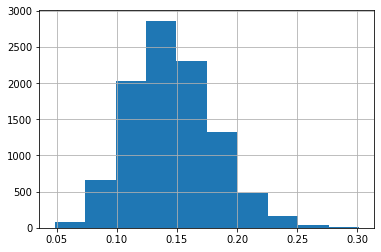

In [37]:
n_draws = 1000000
prior = pd.Series(np.random.uniform(0, 1, n_draws))
sim_data = np.random.binomial(n_visits, prior)
posteriors = prior[[i for i, x in enumerate(sim_data) if x == buyers]]
posteriors.hist();

Produce a set of descriptive statistics for the posterior distribution.

In [38]:
posteriors.describe()

count    9969.000000
mean        0.146517
std         0.035202
min         0.048220
25%         0.121679
50%         0.144222
75%         0.168645
max         0.301644
dtype: float64

What is the 90% credible interval range?

In [46]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.90

n = len(posteriors)
m = mean(posteriors)
std_err = sem(posteriors)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print (start)

0.1459369270992856


In [47]:
end = m + h
print (end)

0.14709689115512467


What is the Maximum Likelihood Estimate?

In [48]:
posteriors.mode()

0       0.048220
1       0.050451
2       0.051801
3       0.053947
4       0.055224
5       0.056714
6       0.057522
7       0.057691
8       0.057977
9       0.058201
10      0.058777
11      0.058843
12      0.059031
13      0.059650
14      0.059985
15      0.060013
16      0.060124
17      0.060387
18      0.060830
19      0.061588
20      0.061672
21      0.062268
22      0.062822
23      0.062954
24      0.063367
25      0.064025
26      0.064790
27      0.064867
28      0.065438
29      0.065616
          ...   
9939    0.260991
9940    0.261012
9941    0.261710
9942    0.261720
9943    0.262647
9944    0.263812
9945    0.263895
9946    0.264547
9947    0.264708
9948    0.264849
9949    0.264878
9950    0.265398
9951    0.265841
9952    0.266139
9953    0.267085
9954    0.267397
9955    0.267547
9956    0.267842
9957    0.268494
9958    0.269064
9959    0.269212
9960    0.271961
9961    0.276478
9962    0.278947
9963    0.280396
9964    0.282350
9965    0.285825
9966    0.2915